<a href="https://colab.research.google.com/github/Seitenshi/Board-Exam-Data-Analytics/blob/main/NeuralNetwork_BoardExam_Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Class
class Model(nn.Module):
  #input features1 = 8
  #hidden layer = 4
  #h1 = 20
  #h2 = 30
  #h3 = 40
  #h4 = 50
  #output layer = 2 (0,1) pass|fail

  #def __init__(self, input=8, h1=120, h2=130, h3=140, h4=150, output=2):
  def __init__(self, input=8, h1=16, h2=16, h3=16, h4=16, output=2):
    super().__init__() #instantiation
    self.fc1 = nn.Linear(input,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,h4)
    self.out = nn.Linear(h4,output)

  #forwarding of nodes
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.out(x)

    return x

In [ ]:
#Manual seed for randomization
torch.manual_seed(69)

#Instantiation
model = Model()

In [ ]:
#import pandas and chart maker
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/Seitenshi/Board-Exam-Data-Analytics/main/BED%20Test%20-%20Combined.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df

,Subj01,Subj02,Subj03,Gen. Average,Remarks,REGION/PROVINCE/CITY,SEX,# OF TAKES CORREL 1,# OF TAKES CORREL 2,# OF TAKES CORREL 3,GRADE IN CORREL 1,GRADE IN CORREL 2,GRADE IN CORREL 3
0,74.0,87.0,70.0,76.50,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0
1,60.0,42.0,44.0,49.00,0.0,0.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0
2,66.0,89.0,79.0,77.45,1.0,0.0,1.0,1.0,1.0,2.0,2.5,2.5,1.0
3,77.0,86.0,75.0,79.00,1.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0
4,74.0,82.0,67.0,73.95,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,74.0,72.0,72.0,72.70,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.5
292,72.0,28.0,42.0,48.30,0.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
293,71.0,74.0,72.0,72.25,1.0,0.0,0.0,4.0,1.0,3.0,1.5,1.5,1.0
294,56.0,74.0,62.0,63.50,0.0,1.0,0.0,1.0,1.0,1.0,1.5,2.0,1.0


In [ ]:
#change the last column from string to int
my_df['Remarks'] = my_df['Remarks'].replace('FAILED',0)
my_df['Remarks'] = my_df['Remarks'].replace('PASSED',1)

# Drop rows with null values
my_df = my_df.dropna()
my_df = my_df.drop('Subj01', axis = 1)
my_df = my_df.drop('Subj02', axis = 1)
my_df = my_df.drop('Subj03', axis = 1)
my_df = my_df.drop('Gen. Average', axis = 1)


my_df

,Remarks,REGION/PROVINCE/CITY,SEX,# OF TAKES CORREL 1,# OF TAKES CORREL 2,# OF TAKES CORREL 3,GRADE IN CORREL 1,GRADE IN CORREL 2,GRADE IN CORREL 3
0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0
1,0.0,0.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,2.0,2.5,2.5,1.0
3,1.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
291,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.5
292,0.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
293,1.0,0.0,0.0,4.0,1.0,3.0,1.5,1.5,1.0
294,0.0,1.0,0.0,1.0,1.0,1.0,1.5,2.0,1.0


In [ ]:
#Drop last column of the df
X = my_df.drop('Remarks', axis = 1)
y = my_df['Remarks']

In [ ]:
#Change the dataframe X and y as numpy array values
X = X.values
y = y.values

In [ ]:
#import scikitlearn for train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=69)

In [ ]:
#Convert X to float tensors (bc the data from the dataframe is in float or have decimals)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
#Convert y to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Set Criterion of model to measure the error (how far the predictions are from the data)
criterion = nn.CrossEntropyLoss()

#Optimizer = Adam (Popular)
#lr = learning rate (if the error doesnt go down after a bunch of iteration, lower the lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#Training the Model
#Epoch is the iteration
epochs = 4200
losses = []

for i in range(epochs):
  #Prediction
  y_pred = model.forward(X_train) #-> Predicted results

  #Measure the loss or error
  loss = criterion(y_pred, y_train) #-> pred value vs train data

  #Tracking the losses
  losses.append(loss.detach().numpy())

  #Printing the epoch by 10
  if i % 10 == 0:
    print(f'Epoch {i} and loss {loss}')

  #Back Propagation - take the error rate and feed it back to the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 0.6703197956085205
Epoch 10 and loss 0.6285479664802551
Epoch 20 and loss 0.5975641012191772
Epoch 30 and loss 0.5688281655311584
Epoch 40 and loss 0.5406008958816528
Epoch 50 and loss 0.5156675577163696
Epoch 60 and loss 0.4884205162525177
Epoch 70 and loss 0.4811303913593292
Epoch 80 and loss 0.4663759469985962
Epoch 90 and loss 0.4422622621059418
Epoch 100 and loss 0.43539437651634216
Epoch 110 and loss 0.5267233848571777
Epoch 120 and loss 0.46816810965538025
Epoch 130 and loss 0.42102211713790894
Epoch 140 and loss 0.4023270010948181
Epoch 150 and loss 0.3896552324295044
Epoch 160 and loss 0.3729149103164673
Epoch 170 and loss 0.364270955324173
Epoch 180 and loss 0.3675580322742462
Epoch 190 and loss 0.3658714294433594
Epoch 200 and loss 0.34430938959121704
Epoch 210 and loss 0.3326340317726135
Epoch 220 and loss 0.32440078258514404
Epoch 230 and loss 0.3231825530529022
Epoch 240 and loss 0.364896684885025
Epoch 250 and loss 0.35467877984046936
Epoch 260 and loss 

Text(0.5, 0, 'epoch')

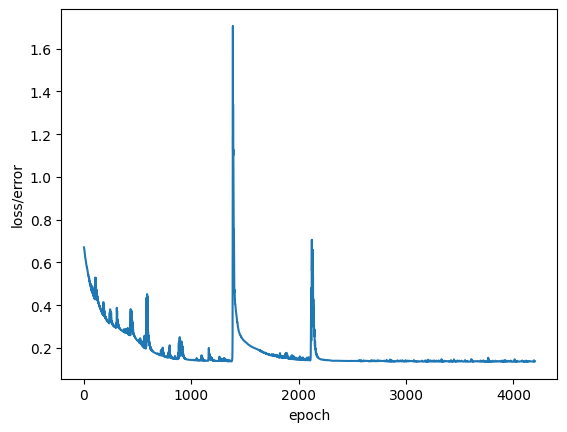

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('epoch')

In [ ]:
#Evaluation of Model (test)
with torch.no_grad(): #Turn off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [ ]:
loss

tensor(4.1546)

In [ ]:
#Checking if the model predicts properly
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    #Semi Predictions
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #Checking if correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'No of correct items: {correct}')

1.) tensor([-13.7545,  15.1367]) 	 1 	 1
2.) tensor([-8.5750,  8.3573]) 	 0 	 1
3.) tensor([ 6.1266, -5.8839]) 	 0 	 0
4.) tensor([-1.9310,  2.0803]) 	 1 	 1
5.) tensor([-6.3633,  6.4473]) 	 0 	 1
6.) tensor([-2.3068,  4.3259]) 	 1 	 1
7.) tensor([-6.5189,  6.4810]) 	 0 	 1
8.) tensor([-11.8039,  14.2655]) 	 1 	 1
9.) tensor([ 2.5310, -2.3116]) 	 1 	 0
10.) tensor([ 4.6177, -4.4569]) 	 0 	 0
11.) tensor([ 0.6088, -0.5369]) 	 1 	 0
12.) tensor([ 3.0313, -2.8052]) 	 0 	 0
13.) tensor([-3.7088,  3.7500]) 	 1 	 1
14.) tensor([-8.5750,  8.3573]) 	 1 	 1
15.) tensor([ 2.1701, -1.9215]) 	 1 	 0
16.) tensor([0.3517, 0.0146]) 	 1 	 0
17.) tensor([-0.9724,  1.0375]) 	 1 	 1
18.) tensor([-1.9701,  2.0334]) 	 0 	 1
19.) tensor([-5.0525,  6.0481]) 	 1 	 1
20.) tensor([-16.4049,  16.0685]) 	 1 	 1
21.) tensor([ 0.3312, -0.0159]) 	 0 	 0
22.) tensor([ 3.6717, -3.3509]) 	 1 	 0
23.) tensor([-21.6086,  23.0185]) 	 1 	 1
24.) tensor([-5.0886,  5.5454]) 	 1 	 1
25.) tensor([-3.5815,  4.0816]) 	 1 	 1
26.